In [21]:
# When Tab Key is not working...
%config Completer.use_jedi = False

In [1]:
import folium
import json

crime_gu = pd.DataFrame({'구분':['강남구','강동구','강북구', '강서구', '관악구'], '건수': [100,10,3,3,80]})
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0
2,중부,강도,발생,6
3,중부,강도,검거,6
4,중부,강간,발생,173


In [5]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
my_map

In [6]:
folium.Choropleth(
geo_data=geo_str,
data=crime_gu,
columns=['구분', 
        '건수'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='PuRd',
    legend_name='살인 발생 건수'
).add_to(my_map)
my_map

In [12]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
geo_data=geo_str,
data=crime_gu,
columns=['구분', 
        '건수'],
    nan_fill_color='purple', nan_fill_opacity=1,
    key_on='feature.id', fill_color='PuRd',
    legend_name='Murder Case'
).add_to(my_map)
my_map

In [15]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
geo_data=geo_str,
data=crime_gu,
columns=['구분', 
        '건수'],
    nan_fill_color='purple', nan_fill_opacity=0.5,
    key_on='feature.id', fill_color='PuRd',
    legend_name='Murder Case'
).add_to(my_map)
my_map

In [17]:
import numpy as np

crime_raw_data = pd.read_csv('./data/seoul_crime/2000년.csv',
                            usecols=[0,1,2,3], encoding='euc-kr')
crime_raw_data.tail()

,구분,죄종,발생검거,건수
305,수서,강간,검거,29
306,수서,절도,발생,1183
307,수서,절도,검거,352
308,수서,폭력,발생,3351
309,수서,폭력,검거,2983


In [26]:
crime_raw_data.pivot_table(
crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])

sum                                            
      건수                                            
죄종    강간      강도       살인       절도          폭력      
발생검거  검거  발생  검거   발생  검거  발생   검거    발생    검거    발생
구분                                                  
강남    70  78  72  146   4   3  523  2653  4345  4892
강동    58  62  40   49  11  12  671  1838  4333  4716
강북    48  47  48   47   8   9  458   859  3446  3624
강서    64  75  55   75   7   6  509  1559  3988  4361
관악    44  59  36   56   7   8  349  1764  2658  2921
광진    72  69  54   58   5   2  697  1738  4379  4575
구로    53  55  37   35  10  10  345   982  3056  3275
금천    63  66  58   73   9  10  586  1799  4376  4808
남대문   23  26   7   13   3   3  273   451  1132  1139
노원    32  40  18   19   3   3  334   741  2231  2321
도봉    37  46  11   17   2   3  326   813  2642  2778
동대문   65  72  59   69   6   5  529   849  4206  4284
동작    60  67  28   53  13  13  474  1448  3086  3367
마포    57  71  35   59   5   3  416  1295  3678  3931
방배    31  44  19   23   1   1  226   746  1425  1540
서대문   44  54  28   33   2   3  312   747  2300  2391
서부    27  33  13   21   6   6  324   822  2715  3032
서초    61  67  42   66   2   2  431  1079  2538  2618
성동    36  39  21   27  10  10  463  1775  2871  3198
성북    32  38  24   27   3   3  265   629  1800  1877
송파    46  62  24   32   2   2  404  1672  3224  3800
수서    29  31  35   52   3   3  352  1183  2983  3351
양천    44  49  28   50   6   5  419  1383  2611  2871
영등포   44  50  34   47   7   6  348  1101  2965  3225
용산    39  41  36   52   4   5  388  1090  2462  2667
은평    24  28  27   20   1   2  212   658  2092  2223
종로    18  18  36   24   4   4  385   644  1830  1886
종암    39  39  26   28   8   8  372   825  2787  2959
중랑    69  74  43   82  12  13  555  1042  3744  3887
중부    14  14  15   17   1   1  569   601  1762  1783
혜화    41  40  24   30   3   3  429  1239  2444  2631

In [29]:
crime_station = crime_raw_data.pivot_table(
crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])
crime_station.columns = crime_station.columns.droplevel([0,1,2])
crime_station.head()

발생검거,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생
구분,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892
강동,58,62,40,49,11,12,671,1838,4333,4716
강북,48,47,48,47,8,9,458,859,3446,3624
강서,64,75,55,75,7,6,509,1559,3988,4361
관악,44,59,36,56,7,8,349,1764,2658,2921


In [31]:
crime_station.columns = ['강간', 1, '강도', 2, '살인', 3, '절도', 4, '폭력', 5,]
crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]
crime_station.head()

,강간,강도,살인,절도,폭력
구분,,,,,
강남,70,72,4,523,4345
강동,58,40,11,671,4333
강북,48,48,8,458,3446
강서,64,55,7,509,3988
관악,44,36,7,349,2658


In [32]:
crime_station['year'] = 2000
crime_station.head()

,강간,강도,살인,절도,폭력,year
구분,,,,,,
강남,70,72,4,523,4345,2000
강동,58,40,11,671,4333,2000
강북,48,48,8,458,3446,2000
강서,64,55,7,509,3988,2000
관악,44,36,7,349,2658,2000


In [33]:
from glob import glob
glob('./data/seoul_crime/*')

['./data/seoul_crime\\2000년.csv',
 './data/seoul_crime\\2001년.csv',
 './data/seoul_crime\\2002년.csv',
 './data/seoul_crime\\2003년.csv',
 './data/seoul_crime\\2004년.csv',
 './data/seoul_crime\\2005년.csv',
 './data/seoul_crime\\2006년.csv',
 './data/seoul_crime\\2007년.csv',
 './data/seoul_crime\\2008년.csv',
 './data/seoul_crime\\2009년.csv',
 './data/seoul_crime\\2010년.csv',
 './data/seoul_crime\\2011년.csv',
 './data/seoul_crime\\2012년.csv',
 './data/seoul_crime\\2013년.csv',
 './data/seoul_crime\\2014년.csv',
 './data/seoul_crime\\2015년.csv',
 './data/seoul_crime\\2016년.csv',
 './data/seoul_crime\\2017년.csv']

In [34]:
file_list = glob('./data/seoul_crime/*')
file_list

['./data/seoul_crime\\2000년.csv',
 './data/seoul_crime\\2001년.csv',
 './data/seoul_crime\\2002년.csv',
 './data/seoul_crime\\2003년.csv',
 './data/seoul_crime\\2004년.csv',
 './data/seoul_crime\\2005년.csv',
 './data/seoul_crime\\2006년.csv',
 './data/seoul_crime\\2007년.csv',
 './data/seoul_crime\\2008년.csv',
 './data/seoul_crime\\2009년.csv',
 './data/seoul_crime\\2010년.csv',
 './data/seoul_crime\\2011년.csv',
 './data/seoul_crime\\2012년.csv',
 './data/seoul_crime\\2013년.csv',
 './data/seoul_crime\\2014년.csv',
 './data/seoul_crime\\2015년.csv',
 './data/seoul_crime\\2016년.csv',
 './data/seoul_crime\\2017년.csv']

In [35]:
for each in file_list:
    print(each)

./data/seoul_crime\2000년.csv
./data/seoul_crime\2001년.csv
./data/seoul_crime\2002년.csv
./data/seoul_crime\2003년.csv
./data/seoul_crime\2004년.csv
./data/seoul_crime\2005년.csv
./data/seoul_crime\2006년.csv
./data/seoul_crime\2007년.csv
./data/seoul_crime\2008년.csv
./data/seoul_crime\2009년.csv
./data/seoul_crime\2010년.csv
./data/seoul_crime\2011년.csv
./data/seoul_crime\2012년.csv
./data/seoul_crime\2013년.csv
./data/seoul_crime\2014년.csv
./data/seoul_crime\2015년.csv
./data/seoul_crime\2016년.csv
./data/seoul_crime\2017년.csv


In [46]:
for each in file_list:
    print(each.split('\\')[-1][:4])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [49]:
crime_station_t = []

for each in file_list:
    crime_raw_data = pd.read_csv(each,
                                usecols=[0,1,2,3], encoding='euc-kr')
    crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])
    crime_station.columns = crime_station.columns.droplevel([0,1,2])
    crime_station.columns = ['강간', 1, '강도', 2, '살인', 3, '절도', 4, '폭력', 5,]
    crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]
    crime_station.head()
    crime_station['year'] = each.split('\\')[-1][:4]
    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)

In [50]:
crime_station_t

[     구분  강간  강도  살인   절도    폭력  year
 0    강남  70  72   4  523  4345  2000
 1    강동  58  40  11  671  4333  2000
 2    강북  48  48   8  458  3446  2000
 3    강서  64  55   7  509  3988  2000
 4    관악  44  36   7  349  2658  2000
 5    광진  72  54   5  697  4379  2000
 6    구로  53  37  10  345  3056  2000
 7    금천  63  58   9  586  4376  2000
 8   남대문  23   7   3  273  1132  2000
 9    노원  32  18   3  334  2231  2000
 10   도봉  37  11   2  326  2642  2000
 11  동대문  65  59   6  529  4206  2000
 12   동작  60  28  13  474  3086  2000
 13   마포  57  35   5  416  3678  2000
 14   방배  31  19   1  226  1425  2000
 15  서대문  44  28   2  312  2300  2000
 16   서부  27  13   6  324  2715  2000
 17   서초  61  42   2  431  2538  2000
 18   성동  36  21  10  463  2871  2000
 19   성북  32  24   3  265  1800  2000
 20   송파  46  24   2  404  3224  2000
 21   수서  29  35   3  352  2983  2000
 22   양천  44  28   6  419  2611  2000
 23  영등포  44  34   7  348  2965  2000
 24   용산  39  36   4  388  2462  2000
 25   은평  24

In [57]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간,강도,살인,절도,폭력,year
0,강남,70.0,72.0,4.0,523.0,4345.0,2000
1,강동,58.0,40.0,11.0,671.0,4333.0,2000
2,강북,48.0,48.0,8.0,458.0,3446.0,2000
3,강서,64.0,55.0,7.0,509.0,3988.0,2000
4,관악,44.0,36.0,7.0,349.0,2658.0,2000


In [59]:
crime_total_murder = crime_total.pivot('year', '구분', '살인')
crime_total_murder 

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,4.0,11.0,8.0,7.0,7.0,5.0,10.0,9.0,3.0,3.0,...,3.0,6.0,7.0,4.0,1.0,4.0,8.0,12.0,1.0,3.0
2001,18.0,11.0,4.0,18.0,2.0,18.0,5.0,16.0,6.0,9.0,...,5.0,8.0,9.0,3.0,7.0,3.0,12.0,17.0,0.0,4.0
2002,6.0,6.0,7.0,10.0,8.0,15.0,7.0,22.0,3.0,6.0,...,8.0,7.0,2.0,3.0,3.0,1.0,5.0,8.0,2.0,4.0
2003,10.0,6.0,8.0,5.0,3.0,8.0,6.0,14.0,2.0,4.0,...,4.0,7.0,9.0,12.0,6.0,3.0,4.0,13.0,0.0,6.0
2004,6.0,7.0,15.0,7.0,0.0,10.0,13.0,14.0,2.0,5.0,...,5.0,6.0,3.0,8.0,5.0,0.0,6.0,6.0,2.0,6.0
2005,10.0,6.0,9.0,8.0,4.0,16.0,11.0,14.0,1.0,11.0,...,5.0,10.0,3.0,9.0,6.0,3.0,5.0,15.0,3.0,2.0
2006,6.0,3.0,7.0,15.0,4.0,7.0,13.0,6.0,2.0,7.0,...,5.0,6.0,10.0,8.0,3.0,7.0,4.0,13.0,4.0,6.0
2007,4.0,9.0,12.0,3.0,10.0,8.0,19.0,6.0,1.0,10.0,...,3.0,8.0,12.0,7.0,6.0,4.0,9.0,14.0,4.0,2.0
2008,3.0,8.0,8.0,17.0,9.0,5.0,23.0,3.0,1.0,4.0,...,5.0,12.0,18.0,6.0,6.0,6.0,6.0,7.0,4.0,3.0


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

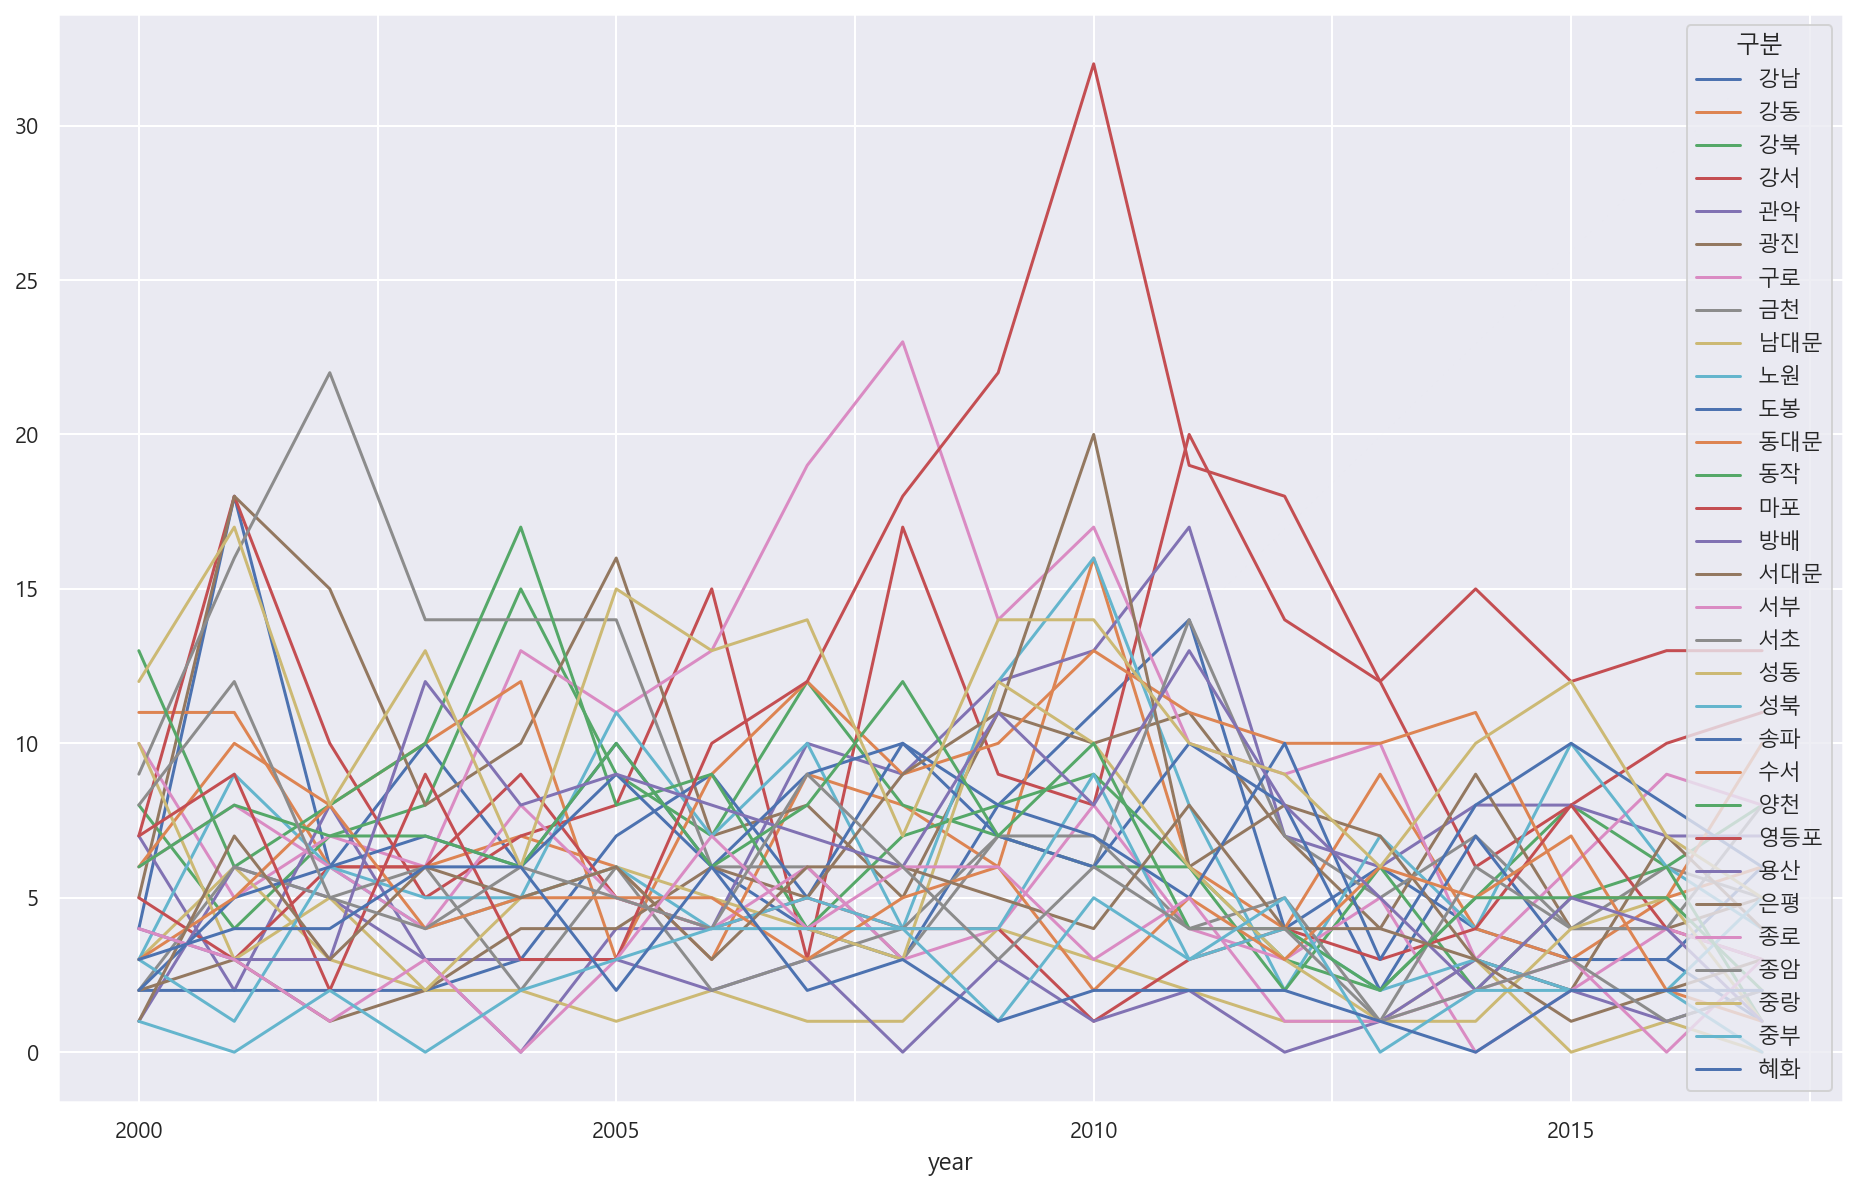

In [61]:
crime_total_murder.plot(figsize=(16,10))
plt.show()

<AxesSubplot:xlabel='구분', ylabel='2010'>

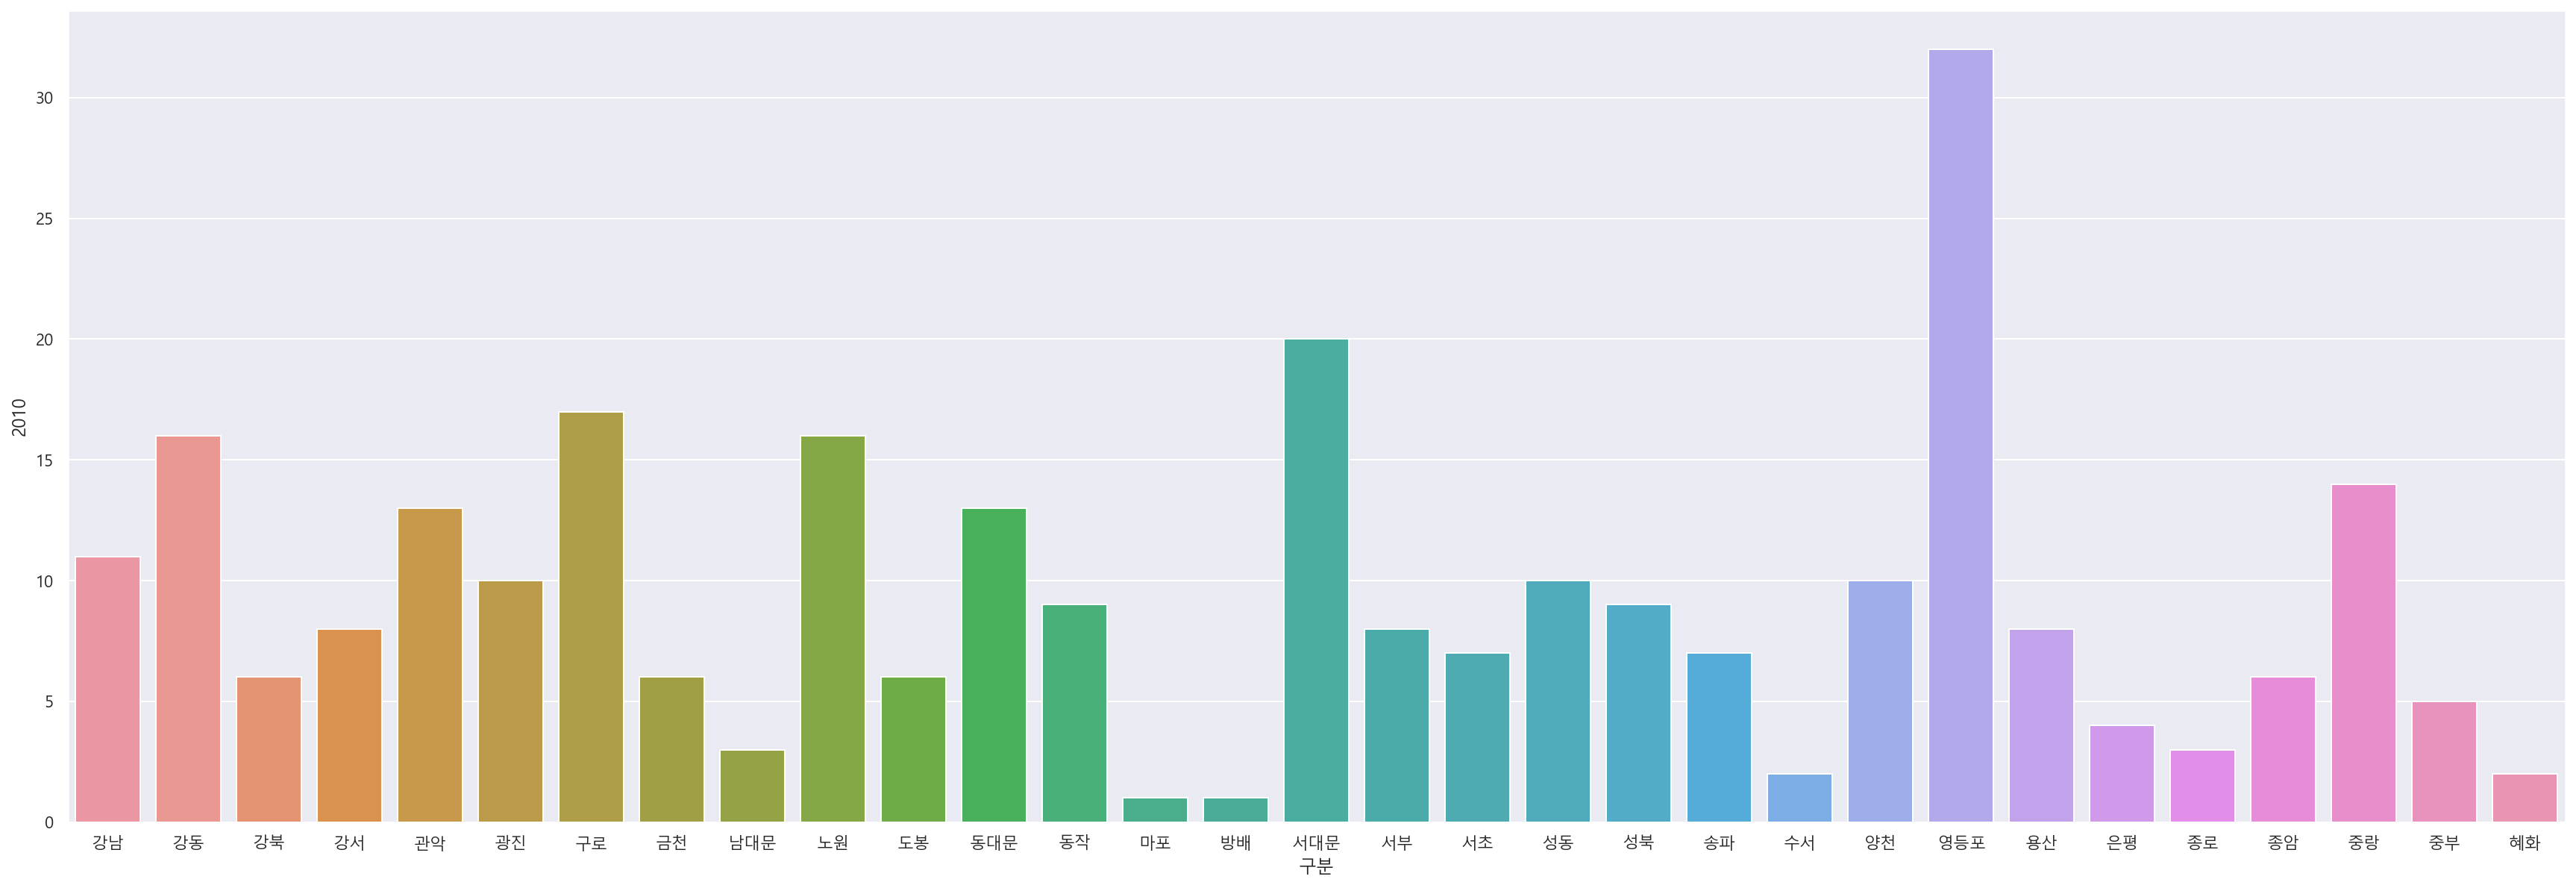

In [102]:
# 2010년 압도적으로 살인건수가 높은 구는 어딜까?
temp = pd.DataFrame(crime_total_murder.iloc[10])
temp = temp.reset_index()
temp['2010'] = temp['2010'].astype('int')
plt.figure(figsize=(30,10))
sns.barplot(x='구분', y='2010', data=temp)

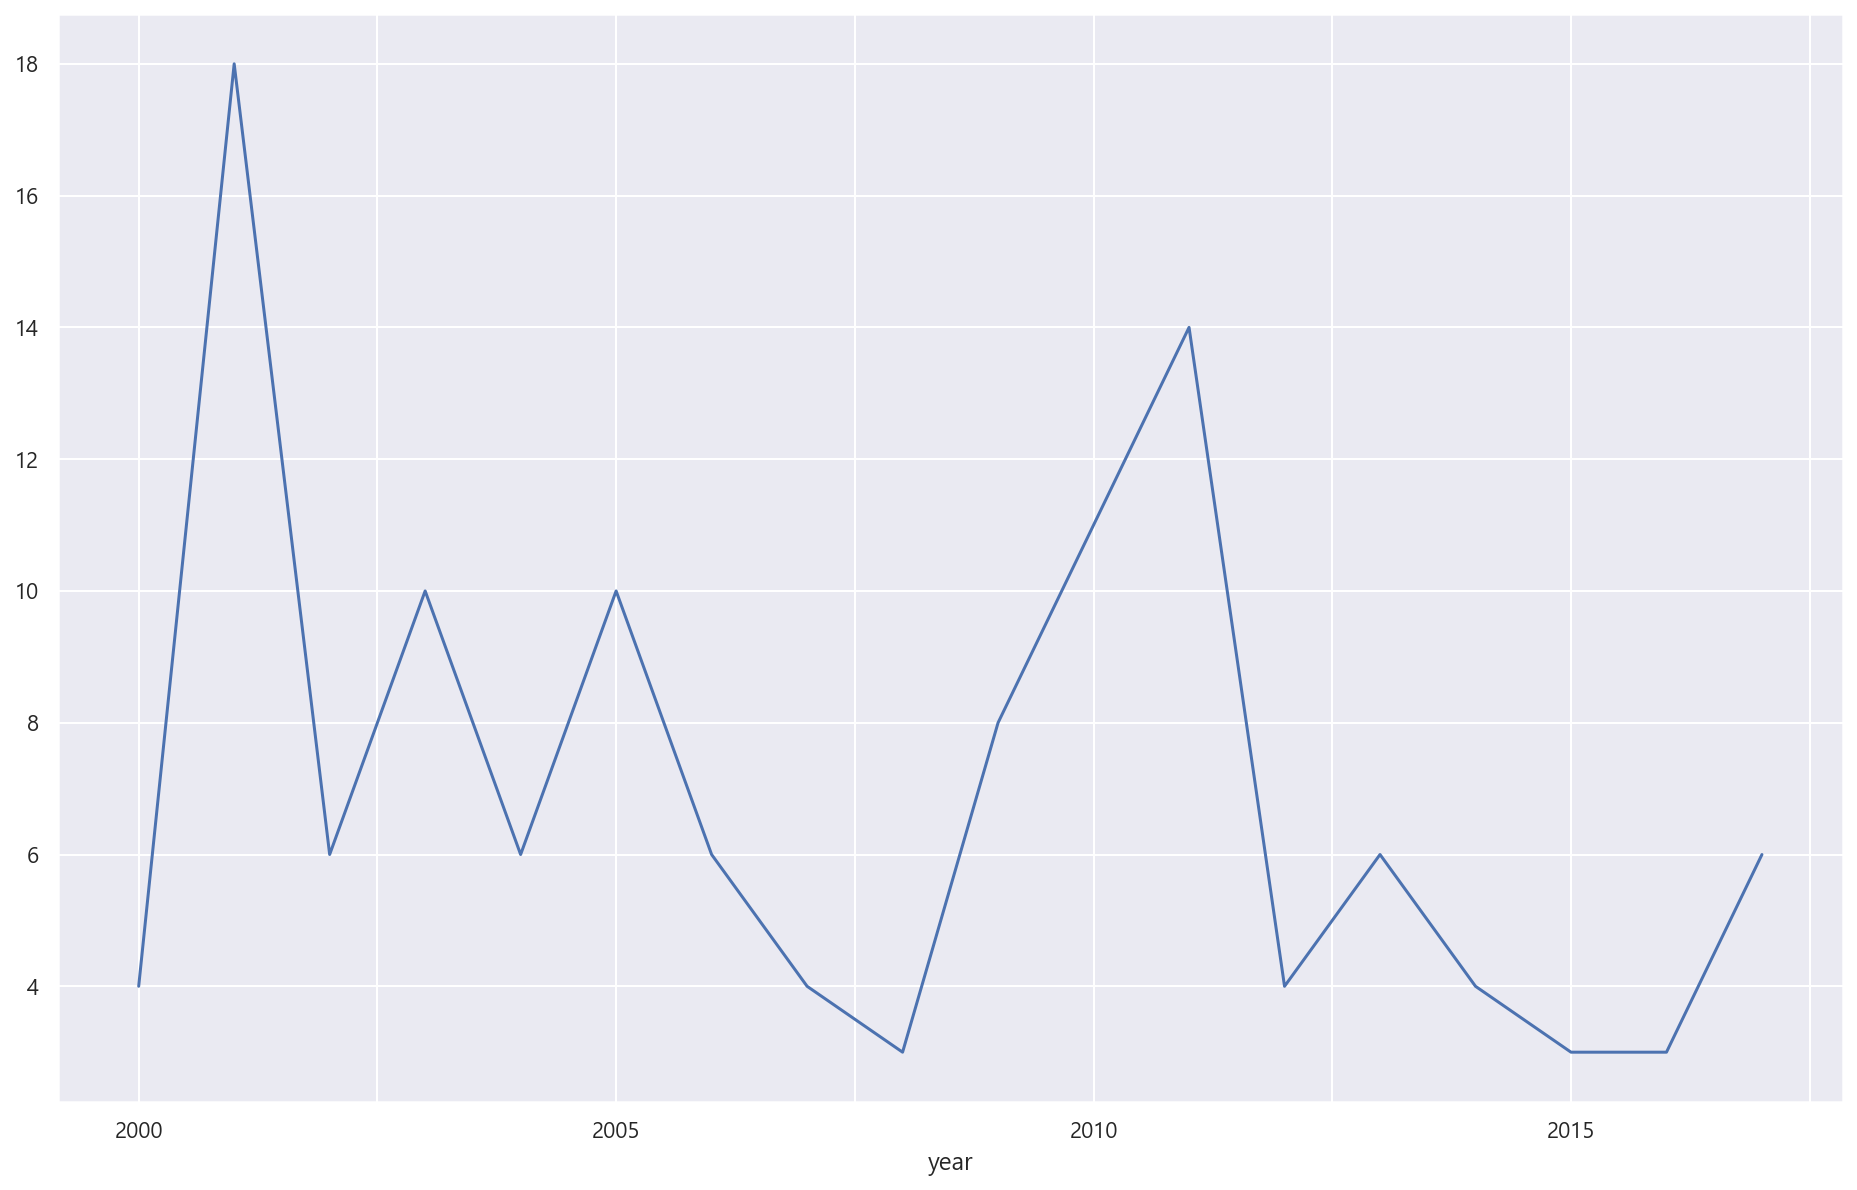

In [103]:
crime_total_murder['강남'].plot(figsize=(16,10))
plt.show()

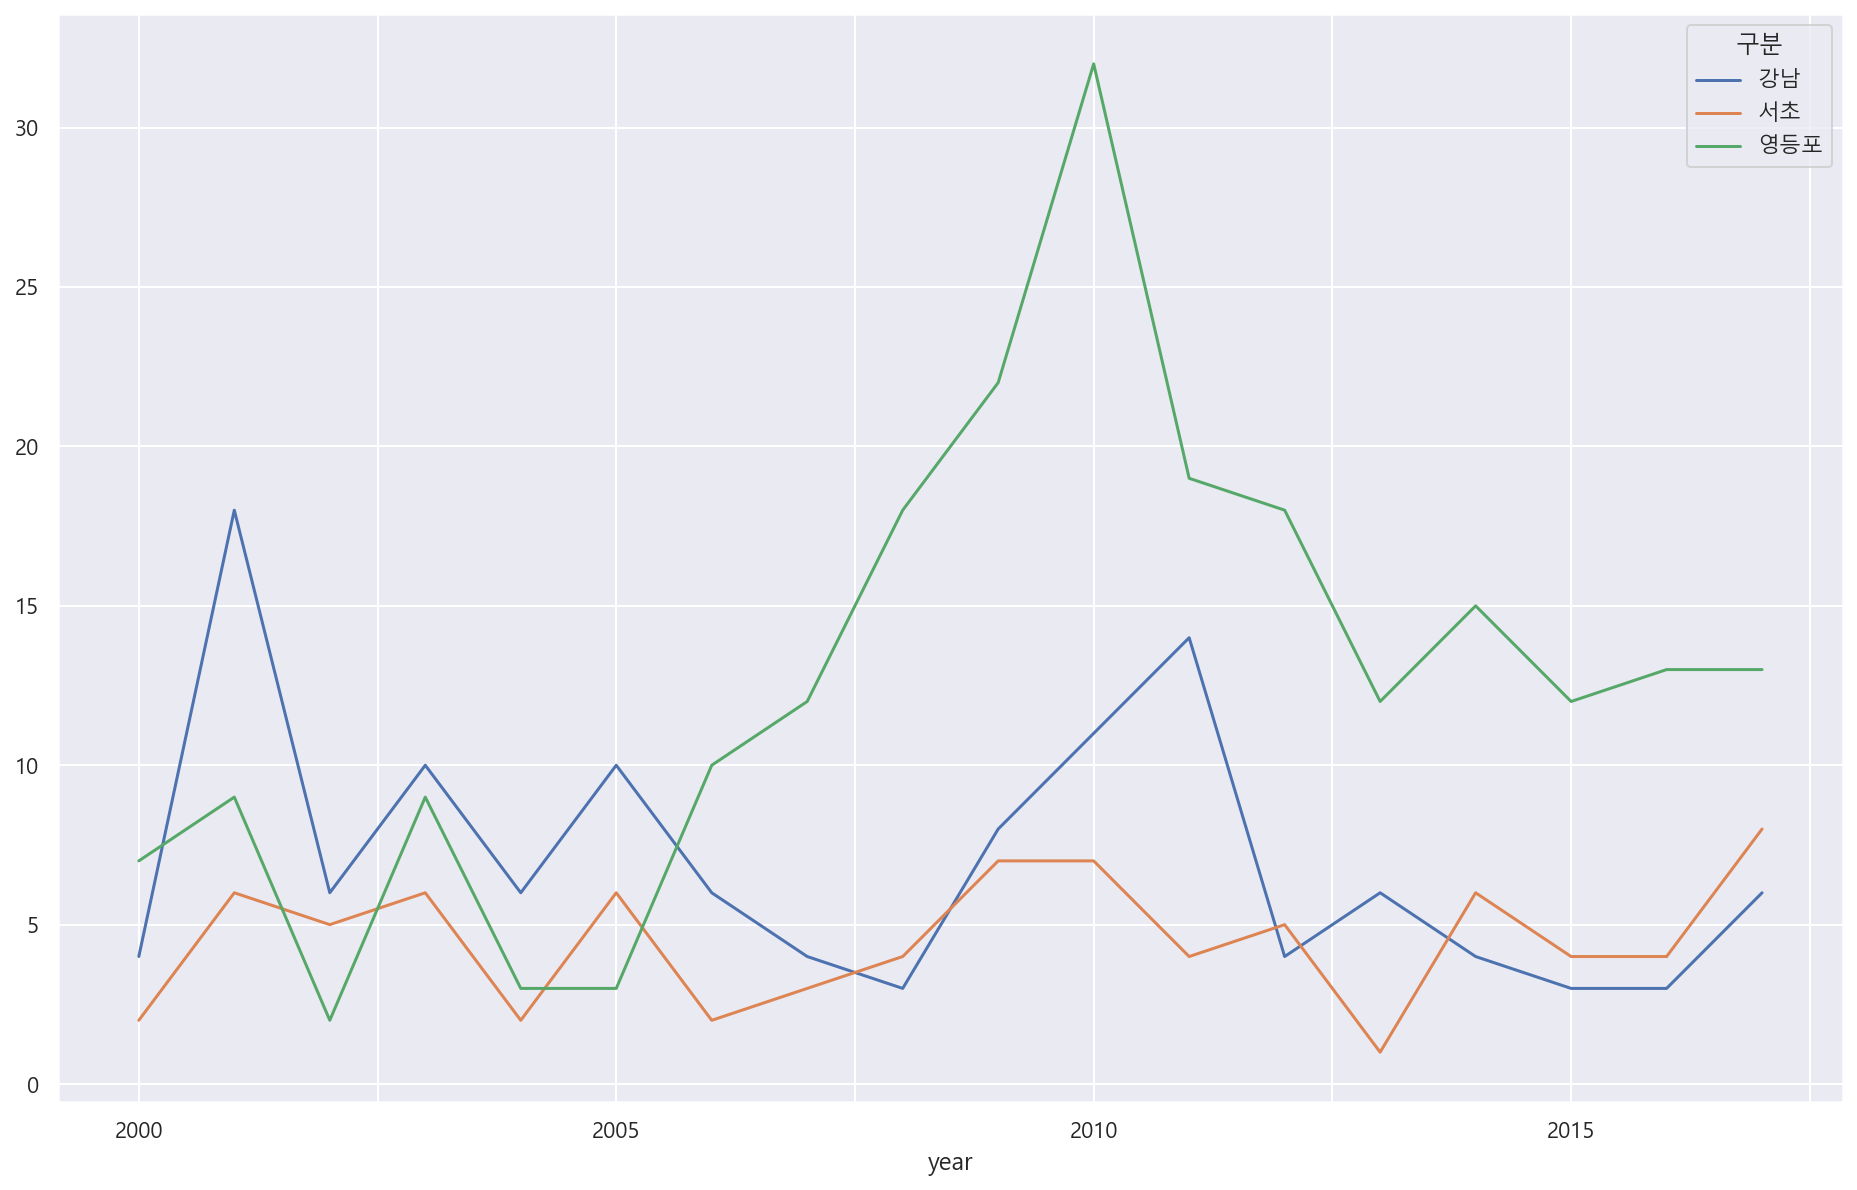

In [104]:
crime_total_murder[['강남', '서초', '영등포']].plot(figsize=(16,10))
plt.show()

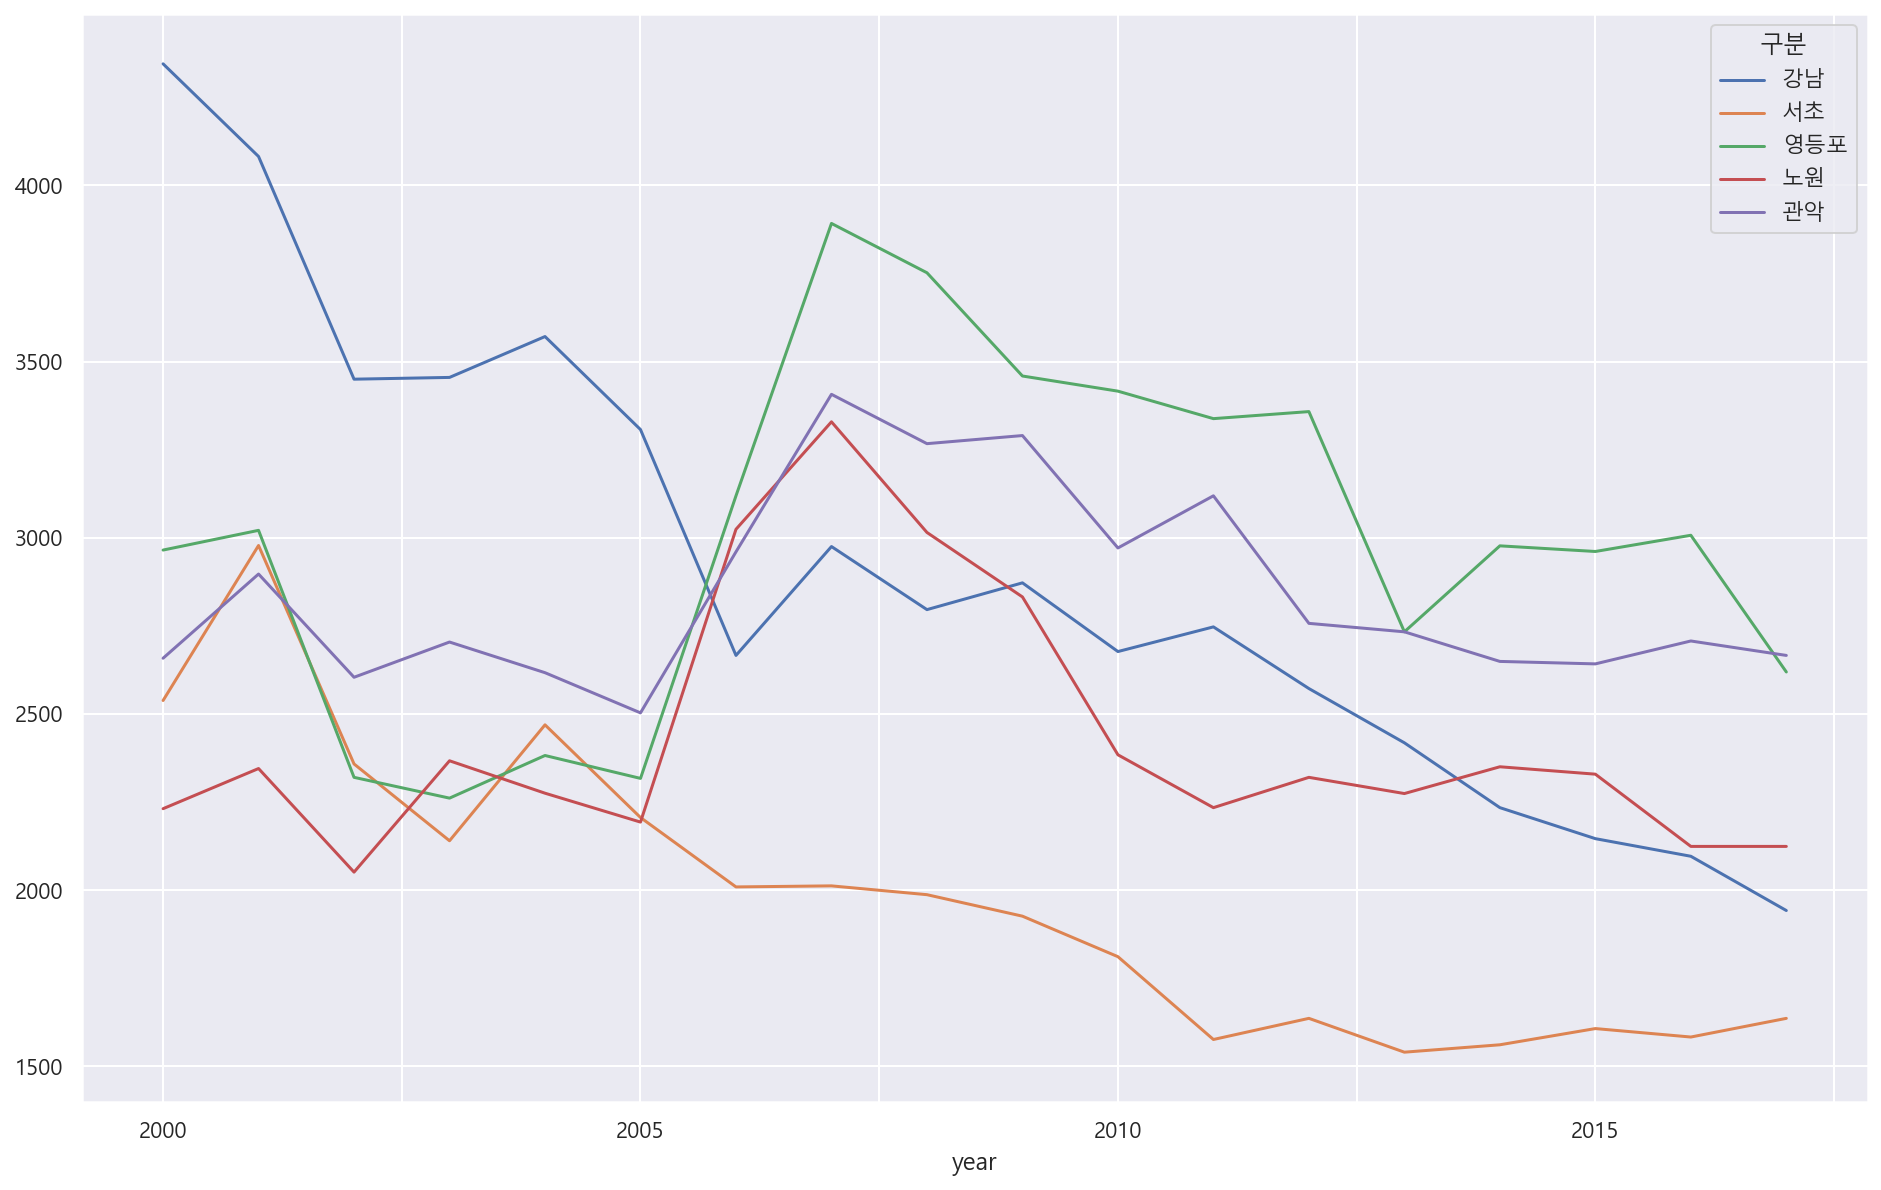

In [106]:
crime_total_violence = crime_total.pivot('year', '구분', '폭력')
crime_total_violence[['강남', '서초', '영등포', '노원', '관악']].plot(figsize=(16,10))
plt.show()

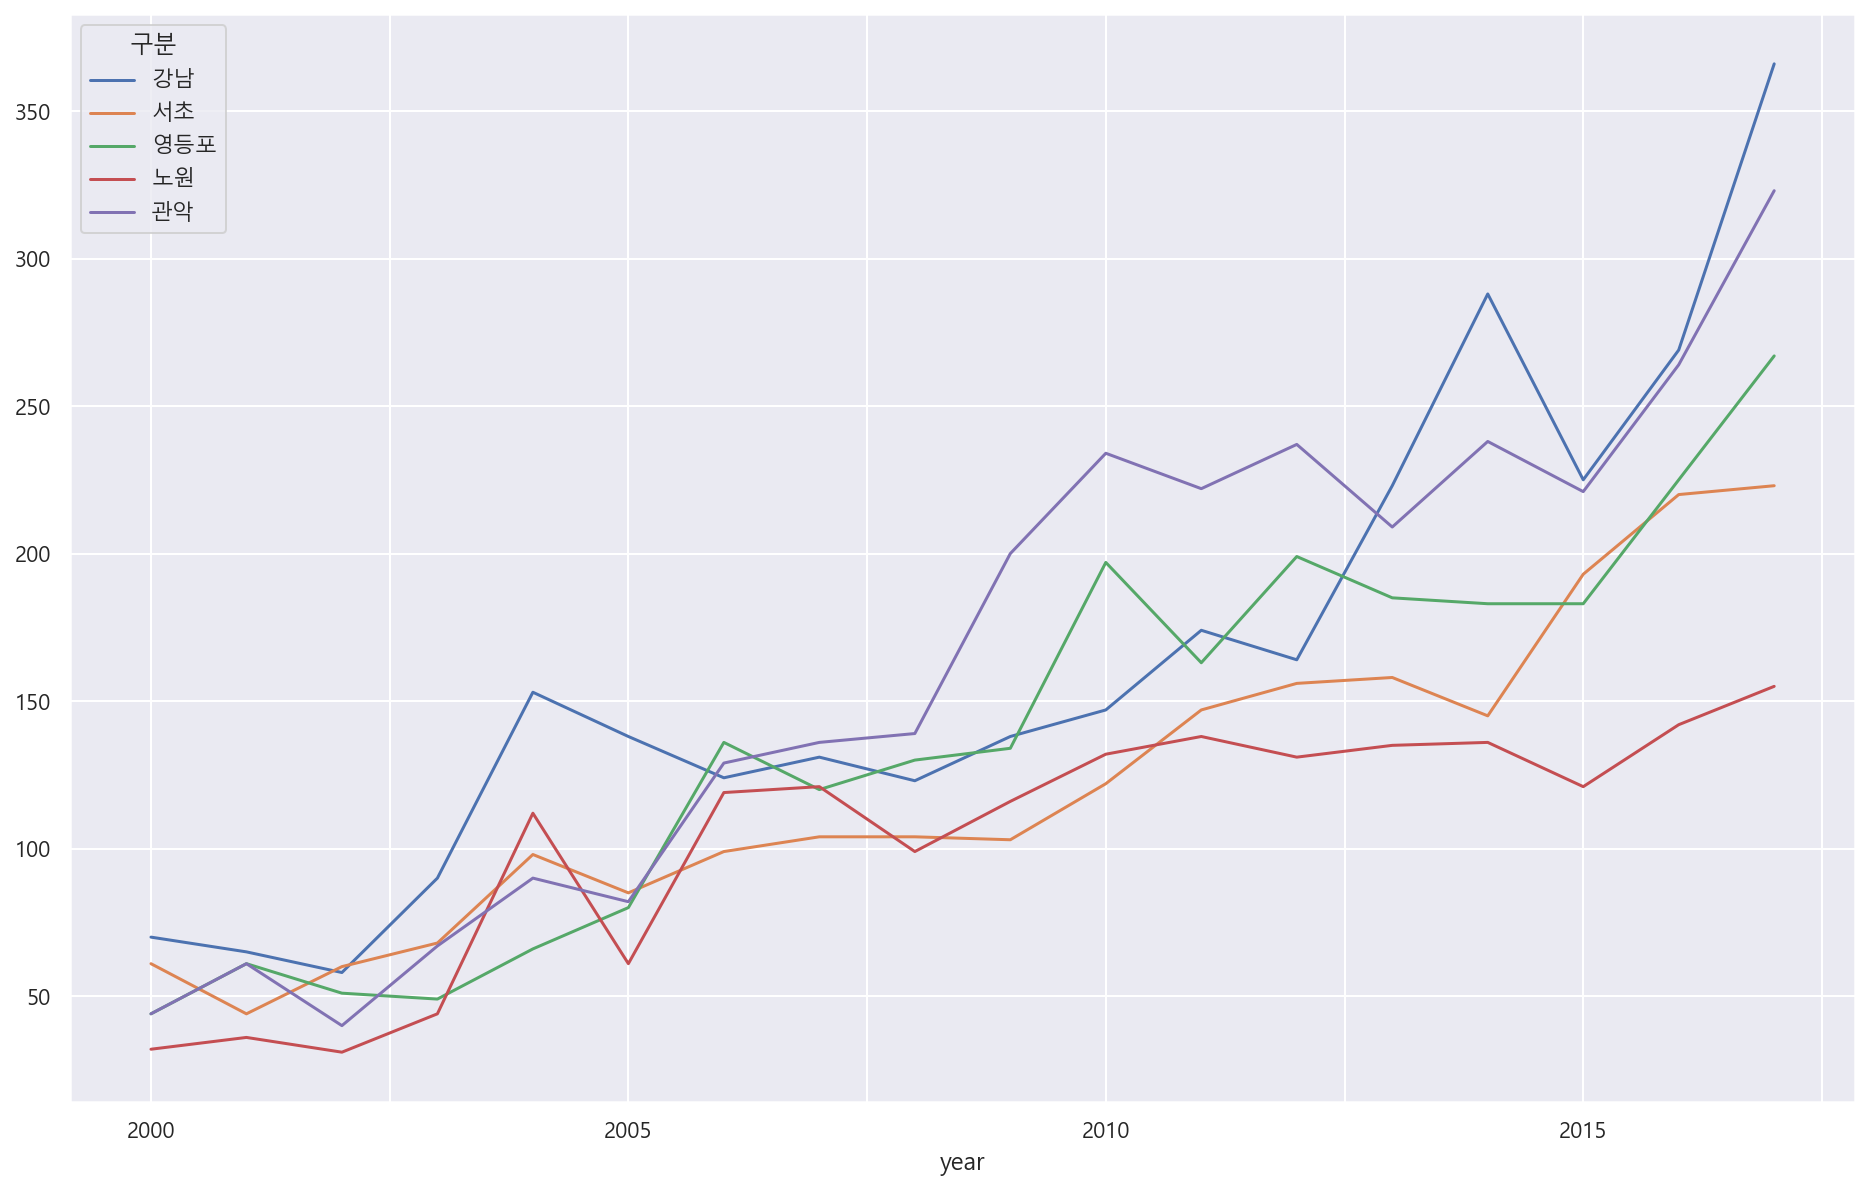

In [107]:
crime_total_sexual = crime_total.pivot('year', '구분', '강간')
crime_total_sexual[['강남', '서초', '영등포', '노원', '관악']].plot(figsize=(16,10))
plt.show()